In [1]:
import pandas as pd
import numpy as np
from sklearn. preprocessing import scale, minmax_scale, robust_scale
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
from sklearn. linear_model import Ridge,  Lasso, ElasticNet
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
matplotlib.rc('font',family = 'Noto Sans CJK JP')
import os
os.getcwd()
path = '/home/piai/다운로드'

# 차주

In [2]:
df_chaju = pd.read_csv(path + "/CreDB_chaju.CSV", engine = "python", encoding="cp949")
df_chaju.head()

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,marriage,income_home_grp,income_ind_grp,expenditure_grp,child_cd,no_child,flag_priv_biz_cd
0,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,300-399만원,100-199만원,Y,0,N
1,C-1002,C05,484,여성,66,60대,전업주부,초등학교 졸업,자가,아파트,기혼,200-299만원,모름/무응답,99만원 이하,N,3,Y
2,C-1003,C05,478,남성,43,40대,판매/서비스직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,100-199만원,N,2,N
3,C-1004,C05,445,남성,28,20대,무직/기타,대학교 졸업,자가,아파트,미혼,500-599만원,모름/무응답,99만원 이하,Y,0,N
4,C-1005,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,200-299만원,N,2,N


In [3]:
df_chaju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   chaju_id          1984 non-null   object
 1   credit_class      1984 non-null   object
 2   score_risk        1984 non-null   int64 
 3   gender            1984 non-null   object
 4   age               1984 non-null   int64 
 5   agegroup          1984 non-null   object
 6   job               1984 non-null   object
 7   edu               1984 non-null   object
 8   dwell_type        1984 non-null   object
 9   house_type        1984 non-null   object
 10  marriage          1984 non-null   object
 11  income_home_grp   1984 non-null   object
 12  income_ind_grp    1984 non-null   object
 13  expenditure_grp   1984 non-null   object
 14  child_cd          1984 non-null   object
 15  no_child          1984 non-null   int64 
 16  flag_priv_biz_cd  1984 non-null   object
dtypes: int64(3), o

In [89]:
df_chaju.isna().sum()

chaju_id            0
credit_class        0
score_risk          0
gender              0
age                 0
agegroup            0
job                 0
edu                 0
dwell_type          0
house_type          0
marriage            0
income_home_grp     0
income_ind_grp      0
expenditure_grp     0
child_cd            0
no_child            0
flag_priv_biz_cd    0
dtype: int64

In [6]:
df_chaju.describe()

,score_risk,age,no_child
count,1984.000000,1984.000000,1984.000000
mean,431.570060,48.907258,1.358871
std,97.223664,14.958557,0.921663
min,185.000000,21.000000,0.000000
25%,360.000000,37.000000,0.000000
50%,428.000000,48.000000,2.000000
75%,491.000000,60.000000,2.000000
max,824.000000,85.000000,3.000000


### 차주 id

In [7]:
df_chaju['chaju_id'].value_counts()

C-1803    1
C-2332    1
C-1036    1
C-1623    1
C-2939    1
         ..
C-2570    1
C-2954    1
C-1452    1
C-2000    1
C-2980    1
Name: chaju_id, Length: 1984, dtype: int64

### 차주 신용등급

In [68]:
df_chaju['credit_class'].value_counts()

C05    739
C04    657
C06    348
C03    136
C07     77
C08     18
C02      5
C09      4
Name: credit_class, dtype: int64

(array([739., 348., 657.,   0.,  77., 136.,   0.,  18.,   4.,   5.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

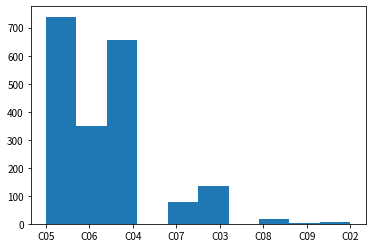

In [95]:
credit_class = df_chaju['credit_class']
plt.hist(credit_class)

### 차주 위험점수

In [70]:
df_chaju['score_risk'].value_counts()

478    43
438    43
428    41
398    38
338    35
       ..
611     1
615     1
625     1
634     1
824     1
Name: score_risk, Length: 225, dtype: int64

### 성별

In [8]:
df_chaju['gender'].value_counts()

남성    1090
여성     894
Name: gender, dtype: int64

### 연령그룹

In [9]:
df_chaju['agegroup'].value_counts()

40대      462
50대      420
30대      372
60대      323
20대      220
70대      133
80대이상     54
Name: agegroup, dtype: int64

(array([372., 323.,   0., 462.,   0., 220., 420.,   0., 133.,  54.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

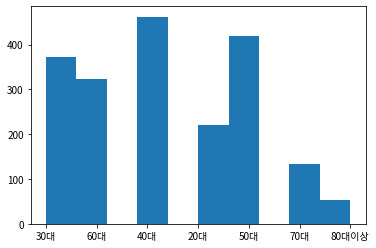

In [96]:
agegroup = df_chaju['agegroup']
plt.hist(agegroup)

### 직업

In [55]:
df_chaju['job'].value_counts()

기능/노무직       435
사무직          405
판매/서비스직      364
전업주부         360
행정관리/전문직     174
무직/기타        136
학생(재수생포함)    110
Name: job, dtype: int64

(array([435., 360.,   0., 364.,   0., 136., 174.,   0., 110., 405.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

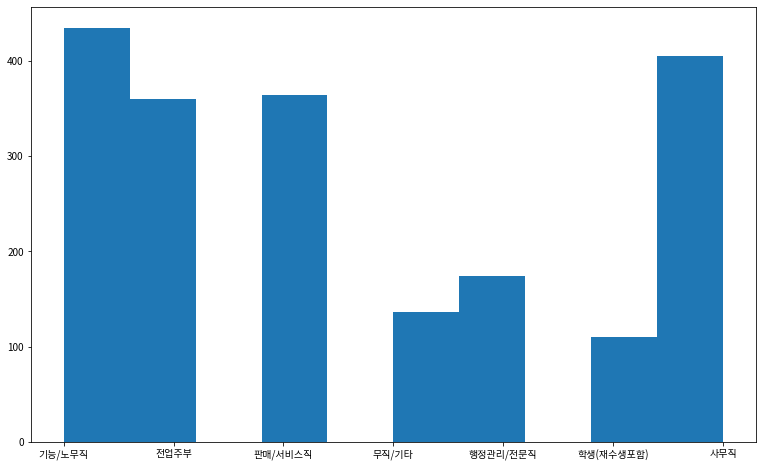

In [99]:
plt.figure(figsize=(13,8))
job = df_chaju['job']
plt.hist(job)

### 교육수준

In [56]:
df_chaju['edu'].value_counts()

대학교 졸업     719
고등학교 졸업    707
전문대학 졸업    223
중학교 졸업     146
대학교 재학      84
대학원 졸업      73
대학원 재학      16
초등학교 졸업     13
전문대학 재학      2
고등학교 재학      1
Name: edu, dtype: int64

(array([719.,  13., 707.,  84., 223., 146.,  73.,  16.,   1.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

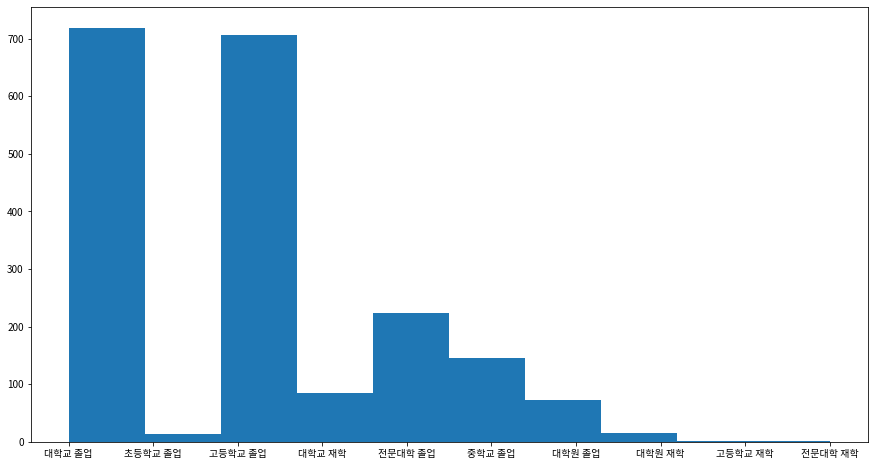

In [108]:
plt.figure(figsize=(15,8))
edu = df_chaju['edu']
plt.hist(edu)

### 주거형태

In [106]:
df_chaju['dwell_type'].value_counts()

자가       1550
전세        338
월세         85
사택/기타       8
영구임대        3
Name: dwell_type, dtype: int64

(array([1550.,    0.,  338.,    0.,    0.,   85.,    0.,    3.,    0.,
           8.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

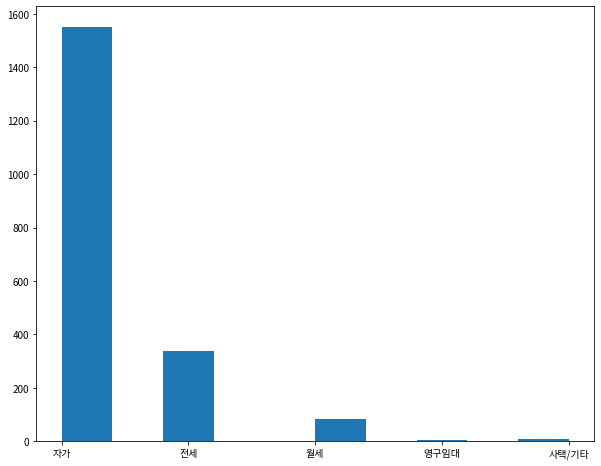

In [107]:
plt.figure(figsize=(10,8))
dwell_type = df_chaju['dwell_type']
plt.hist(dwell_type)

### 주택형태

In [58]:
df_chaju['house_type'].value_counts()

아파트          1190
단독주택          405
연립/다세대/빌라     355
오피스텔           19
상가주택           11
기타              4
Name: house_type, dtype: int64

(array([1190.,    0.,  355.,    0.,  405.,    0.,   19.,    0.,    4.,
          11.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

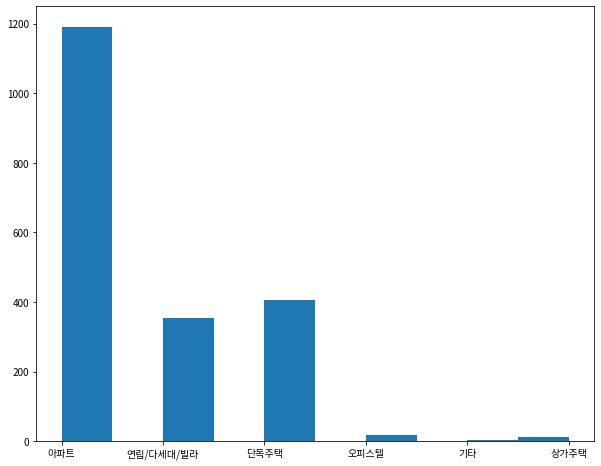

In [109]:
plt.figure(figsize=(10,8))
house_type = df_chaju['house_type']
plt.hist(house_type)

### 결혼상태

In [67]:
df_chaju['marriage'].value_counts()

기혼              1442
미혼               442
기타(이혼/별거/사별)     100
Name: marriage, dtype: int64

(array([ 442.,    0.,    0.,    0.,    0., 1442.,    0.,    0.,    0.,
         100.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

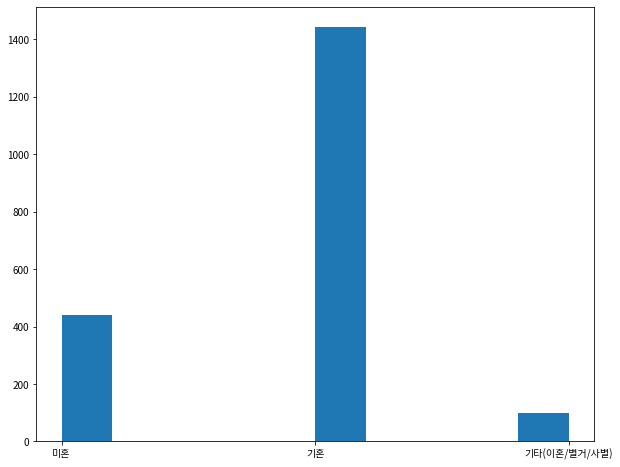

In [110]:
plt.figure(figsize=(10,8))
marriage = df_chaju['marriage']
plt.hist(marriage)

### 가족 월 평균수입

In [61]:
df_chaju['income_home_grp'].value_counts()

500-599만원    404
300-399만원    393
400-499만원    355
600-699만원    247
200-299만원    232
700-799만원    119
100-199만원     83
800-899만원     56
99만원 이하       54
1000만원 이상     23
900-999만원     18
Name: income_home_grp, dtype: int64

(array([ 18., 232., 404., 393., 355.,  56., 247.,  83., 119.,  77.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

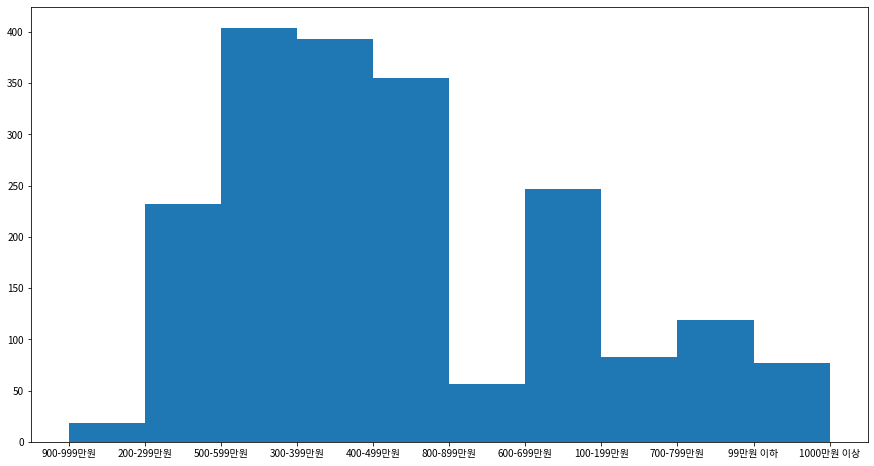

In [112]:
plt.figure(figsize=(15,8))
income_home_grp = df_chaju['income_home_grp']
plt.hist(income_home_grp)

### 개인 월평균수입

In [62]:
df_chaju['income_ind_grp'].value_counts()

모름/무응답       604
200-299만원    489
300-399만원    332
100-199만원    219
400-499만원    142
500-599만원     89
600-699만원     64
99만원 이하       24
700-799만원     13
800-899만원      4
1000만원 이상      3
900-999만원      1
Name: income_ind_grp, dtype: int64

### 개인 월평균 지출

In [63]:
df_chaju['expenditure_grp'].value_counts()

100-199만원    914
99만원 이하      867
200-299만원    150
300-399만원     41
500-599만원      6
400-499만원      6
Name: expenditure_grp, dtype: int64

### 자녀 유무

In [64]:
df_chaju['child_cd'].value_counts()

N    1461
Y     523
Name: child_cd, dtype: int64

### 자녀 수

In [65]:
df_chaju['no_child'].value_counts()

2    1053
0     523
1     317
3      91
Name: no_child, dtype: int64

### 개인사업자여부

In [66]:
df_chaju['flag_priv_biz_cd'].value_counts()

N    1802
Y     182
Name: flag_priv_biz_cd, dtype: int64

### groupby

In [166]:
df_chaju_gb=df_chaju.groupby(['chaju_id','credit_class','score_risk','age','job','edu','dwell_type','house_type','marriage','income_home_grp','income_ind_grp','expenditure_grp','child_cd','no_child','flag_priv_biz_cd'])['agegroup'].count()
df_chaju_gb=pd.DataFrame(df_chaju_gb)

In [167]:
df_chaju_gb

,,,,,,,,,,,,,,,agegroup
chaju_id,credit_class,score_risk,age,job,edu,dwell_type,house_type,marriage,income_home_grp,income_ind_grp,expenditure_grp,child_cd,no_child,flag_priv_biz_cd,
C-1001,C05,478,30,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,300-399만원,100-199만원,Y,0,N,1
C-1002,C05,484,66,전업주부,초등학교 졸업,자가,아파트,기혼,200-299만원,모름/무응답,99만원 이하,N,3,Y,1
C-1003,C05,478,43,판매/서비스직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,100-199만원,N,2,N,1
C-1004,C05,445,28,무직/기타,대학교 졸업,자가,아파트,미혼,500-599만원,모름/무응답,99만원 이하,Y,0,N,1
C-1005,C05,421,52,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,200-299만원,N,2,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C-2996,C05,448,41,사무직,대학교 졸업,자가,단독주택,미혼,300-399만원,300-399만원,100-199만원,Y,0,N,1
C-2997,C04,308,37,사무직,대학교 졸업,자가,아파트,기혼,300-399만원,300-399만원,100-199만원,N,2,N,1
C-2998,C04,371,50,기능/노무직,고등학교 졸업,자가,아파트,기혼,500-599만원,100-199만원,100-199만원,N,2,N,1


In [169]:
df_chaju_gb.to_excel("차주정보.xlsx")

# LOAN

In [45]:
df_loan = pd.read_csv(path + "/CreDB_loan.csv", engine = "python", encoding="cp949")
df_loan.head()

,chaju_id,com_id,check_ym,sector_cd,sector,loan_cd_1,loan_prod_1,loan_cd_2,loan_prod_2,loan_ym,loan_amt
0,C-1001,S01-01010,201905,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
1,C-1001,S01-01010,201901,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
2,C-1001,S01-01010,201902,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
3,C-1001,S01-01010,201812,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
4,C-1001,S01-01010,201904,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000


In [46]:
df_loan["chaju_id"].value_counts()

C-2708    193
C-2498    188
C-2452    187
C-1267    177
C-1582    174
         ... 
C-2775      1
C-1386      1
C-2754      1
C-2903      1
C-1316      1
Name: chaju_id, Length: 1328, dtype: int64

### 대출기관 ID

In [79]:
df_loan["com_id"].value_counts()

S01-01018    1401
S01-01003    1386
S01-01011    1257
S01-01004    1245
S05-01018    1205
             ... 
S03-01161       2
S03-01112       1
S98-01024       1
S03-01045       1
S06-01013       1
Name: com_id, Length: 425, dtype: int64

### 업권코드

In [78]:
df_loan["sector_cd"].value_counts()

S01    19633
S05    15553
S03     7650
S17     6799
S21     5127
S98     2696
S08      851
S06      466
Name: sector_cd, dtype: int64

### 상권

In [72]:
df_loan["sector"].value_counts()

은행(S01)                 19633
신용카드사(S05)              15553
상호금융-농협/수협/금고 등(S03)     7650
캐피탈/할부/리스 등(S17)         6799
상호저축은행(S21)              5127
기타-장학재단/기금 등(S98)        2696
손해보험사(S08)                851
생명보험사(S06)                466
Name: sector, dtype: int64

### 대출상품1

In [76]:
df_loan["loan_prod_1"].value_counts()

개인대출정보(카드대출 제외)    42400
단기카드대출              8367
장기카드대출              8008
Name: loan_prod_1, dtype: int64

### 대출상품2

In [77]:
df_loan["loan_prod_2"].value_counts()

신용대출                   20294
단기카드대출(현금서비스)           8367
장기카드대출(카드론)             8008
주택담보대출                  7016
지급보증(보증서)담보대출           2772
신차할부                    2711
학자금대출                   1722
주택외부동산(토지,상가 등)담보대출     1617
예·적금담보대출                1608
전세자금 대출                 1170
중고차할부                    923
기타담보대출                   862
보금자리론                    514
유가증권(주식 등)담보대출           472
기타할부                     279
운용리스                     196
학자금지급보증대출                171
금융리스                      62
전세보증금 담보대출                 8
전세자금대출                     3
Name: loan_prod_2, dtype: int64

### 대출년월

In [83]:
df_loan["loan_ym"].value_counts()

201812    2233
201906    1778
201806    1579
201912    1526
201712    1512
          ... 
200702      12
200012       9
199901       8
199808       8
200706       8
Name: loan_ym, Length: 190, dtype: int64

### 대출금액

In [84]:
df_loan["loan_amt"].value_counts()

10000000     2407
20000000     1190
15000000     1155
12000000     1105
11000000     1094
             ... 
83000000        4
500000000       4
620000000       3
320000000       2
870000          2
Name: loan_amt, Length: 324, dtype: int64

### groupby

In [159]:
df_loan_gb=df_loan.groupby(['chaju_id','com_id','sector','loan_prod_1','loan_prod_2','loan_ym','loan_amt'])['loan_amt'].count()
df_loan_gb=pd.DataFrame(df_loan_gb)

In [160]:
df_loan_gb

loan_amt
chaju_id com_id    sector     loan_prod_1     loan_prod_2   loan_ym loan_amt          
C-1001   S01-01010 은행(S01)    개인대출정보(카드대출 제외) 주택담보대출        201810  19000000         6
         S01-01016 은행(S01)    개인대출정보(카드대출 제외) 예·적금담보대출      201812  10000000        14
         S05-01011 신용카드사(S05) 단기카드대출          단기카드대출(현금서비스) 201811  1000000          6
         S05-01015 신용카드사(S05) 단기카드대출          단기카드대출(현금서비스) 202004  1000000          2
                                                            202006  1200000          6
...                                                                                ...
C-3000   S05-01017 신용카드사(S05) 단기카드대출          단기카드대출(현금서비스) 201810  1900000          5
                                                            202004  980000           7
                              장기카드대출          장기카드대출(카드론)   201801  7300000         13
         S08-01028 손해보험사(S08) 개인대출정보(카드대출 제외) 신용대출          201705  15000000        25
                                                            201812  3600000         25

[5365 rows x 1 columns]

In [161]:
df_loan_gb.to_excel("대출정보.xlsx")

# CARD

In [85]:
df_card = pd.read_csv(path + "/CreDB_card.csv", engine = "python", encoding="cp949")
df_card.head()

,chaju_id,com_id,sector_cd,sector,check_ym,card_cd,card_type,card_ym,flag_priv_biz_cd
0,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N
1,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202011,신용카드(0081),개인카드(1),200206,N
2,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),201903,신용카드(0081),개인카드(1),200206,N
3,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202002,신용카드(0081),개인카드(1),200206,N
4,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),201904,신용카드(0081),개인카드(1),200206,N


In [86]:
df_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96828 entries, 0 to 96827
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   chaju_id          96828 non-null  object
 1   com_id            96828 non-null  object
 2   sector_cd         96828 non-null  object
 3   sector            96828 non-null  object
 4   check_ym          96828 non-null  int64 
 5   card_cd           96828 non-null  object
 6   card_type         96828 non-null  object
 7   card_ym           96828 non-null  int64 
 8   flag_priv_biz_cd  96828 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.6+ MB


## 이상치

<AxesSubplot:>

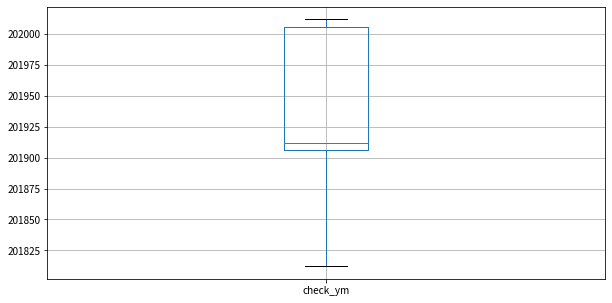

In [87]:
df_card[["check_ym"]].boxplot(figsize = (10,5))

<AxesSubplot:>

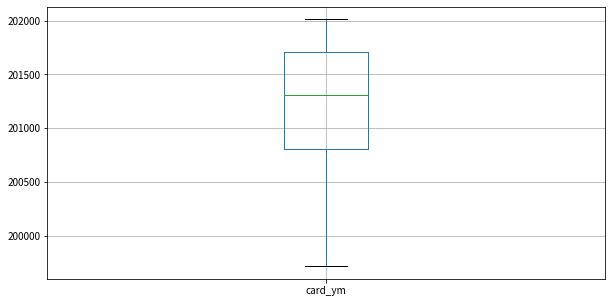

In [88]:
df_card[["card_ym"]].boxplot(figsize = (10,5))

## groupby

In [146]:
df_card_gb=df_card.groupby(['chaju_id','com_id','card_cd','card_type','sector','card_ym'])['card_ym'].count()
df_card_gb=pd.DataFrame(df_card_gb)

In [149]:
df_card_gb.to_excel("카드정보.xlsx")

In [147]:
df_card_gb

card_ym
chaju_id com_id    card_cd    card_type sector               card_ym         
C-1001   S03-01003 신용카드(0081) 개인카드(1)   상호금융-농협/수협/금고 등(S03) 200206        24
         S03-01070 신용카드(0081) 개인카드(1)   상호금융-농협/수협/금고 등(S03) 201512        25
         S05-01001 신용카드(0081) 개인카드(1)   신용카드사(S05)           201307        25
         S05-01016 신용카드(0081) 개인카드(1)   신용카드사(S05)           201711        25
C-1002   S01-01006 신용카드(0081) 개인카드(1)   은행(S01)              201409        25
...                                                                       ...
C-2999   S03-01191 신용카드(0081) 개인카드(1)   상호금융-농협/수협/금고 등(S03) 201801        25
C-3000   S05-01005 신용카드(0081) 개인카드(1)   신용카드사(S05)           201301        25
         S05-01007 신용카드(0081) 개인카드(1)   신용카드사(S05)           200901        25
         S05-01008 신용카드(0081) 개인카드(1)   신용카드사(S05)           201212        25
         S05-01017 신용카드(0081) 개인카드(1)   신용카드사(S05)           201506        25

[4747 rows x 1 columns]

## 데이터 정리

In [150]:
df_card["chaju_id"].value_counts()

C-2649    176
C-2850    175
C-1155    175
C-1766    175
C-2185    170
         ... 
C-1862      1
C-1307      1
C-1216      1
C-2997      1
C-1673      1
Name: chaju_id, Length: 1659, dtype: int64

In [114]:
df_card["com_id"].value_counts()

S05-01013    2738
S05-01004    2731
S05-01012    2695
S05-01018    2691
S05-01003    2594
             ... 
S03-01166      25
S03-01122      25
S03-01150      25
S03-01178      10
S03-01021       2
Name: com_id, Length: 235, dtype: int64

In [116]:
df_card["sector_cd"].value_counts()

S05    43492
S01    30560
S03    22776
Name: sector_cd, dtype: int64

In [117]:
df_card["sector"].value_counts()

신용카드사(S05)              43492
은행(S01)                 30560
상호금융-농협/수협/금고 등(S03)    22776
Name: sector, dtype: int64

# overdue

In [47]:
df_overdue = pd.read_csv(path + "/CreDB_overdue.csv", engine = "python", encoding="cp949")
df_overdue.head()

,chaju_id,com_id,check_ym,sector_cd,sector,over_type,over_reason_cd,over_reason,over_regist,over_ym,over_amt
0,C-1001,S21-01018,202001,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
1,C-1001,S21-01018,202002,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
2,C-1019,S01-01001,202008,S01,은행(S01),공공(2),R-0101,대출원금·이자연체,주채무자(0),202002,270000000
3,C-1019,S01-01001,202003,S01,은행(S01),공공(2),R-0101,대출원금·이자연체,주채무자(0),202002,270000000
4,C-1019,S01-01001,202006,S01,은행(S01),공공(2),R-0101,대출원금·이자연체,주채무자(0),202002,270000000


## 이상치

In [48]:
df_overdue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10784 entries, 0 to 10783
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   chaju_id        10784 non-null  object
 1   com_id          10784 non-null  object
 2   check_ym        10784 non-null  int64 
 3   sector_cd       10784 non-null  object
 4   sector          10784 non-null  object
 5   over_type       10784 non-null  object
 6   over_reason_cd  10784 non-null  object
 7   over_reason     10784 non-null  object
 8   over_regist     10784 non-null  object
 9   over_ym         10784 non-null  int64 
 10  over_amt        10784 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 926.9+ KB


In [13]:
df_overdue.describe()

,check_ym,over_ym,over_amt
count,10784.000000,10784.000000,1.078400e+04
mean,201948.755100,201723.296458,2.038326e+07
std,56.891007,196.736523,9.136425e+07
min,201812.000000,201011.000000,1.000000e+04
25%,201905.000000,201605.000000,1.600000e+06
50%,201912.000000,201801.000000,4.100000e+06
75%,202006.000000,201903.000000,1.000000e+07
max,202012.000000,202012.000000,1.500000e+09


<AxesSubplot:>

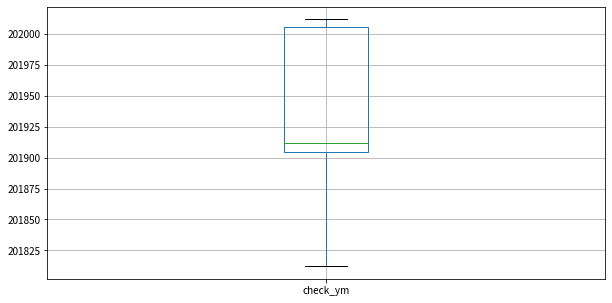

In [14]:
df_overdue[["check_ym"]].boxplot(figsize = (10,5))

<AxesSubplot:>

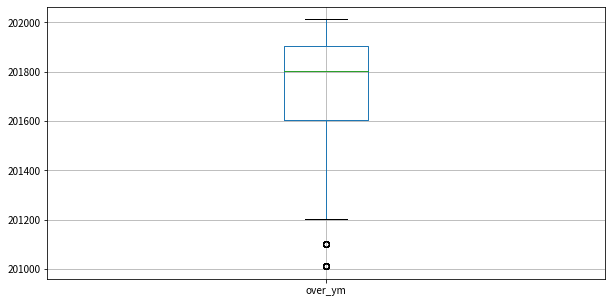

In [15]:
df_overdue[["over_ym"]].boxplot(figsize = (10,5))

<AxesSubplot:>

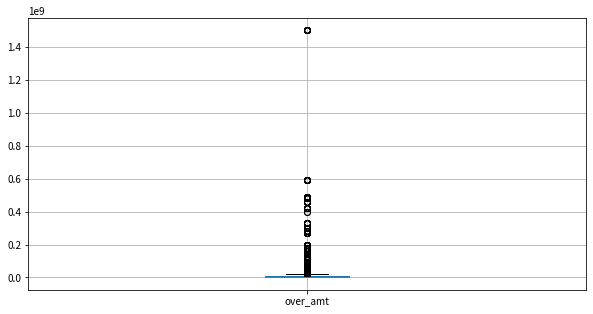

In [16]:
df_overdue[["over_amt"]].boxplot(figsize = (10,5))

## object

## 데이터 정리

In [30]:
df_overdue["chaju_id"].value_counts()

C-1812    150
C-1546    143
C-2073    136
C-1384    132
C-2657    114
         ... 
C-1880      1
C-2641      1
C-2541      1
C-2679      1
C-1241      1
Name: chaju_id, Length: 400, dtype: int64

### 연체자 id

In [50]:
df_overdue["chaju_id"].value_counts()

C-1812    150
C-1546    143
C-2073    136
C-1384    132
C-2657    114
         ... 
C-1880      1
C-2641      1
C-2541      1
C-2679      1
C-1241      1
Name: chaju_id, Length: 400, dtype: int64

### 대출기관 id

In [29]:
df_overdue["com_id"].value_counts()

S05-01013    377
S05-01018    303
S05-01016    302
S05-01017    282
S05-01011    267
            ... 
S17-01018      1
S17-01085      1
S98-01009      1
S03-01161      1
S17-01001      1
Name: com_id, Length: 217, dtype: int64

### 연체기준연월

In [31]:
df_overdue["check_ym"].value_counts()

201812    461
201901    456
201908    450
201909    448
201902    447
201903    447
201905    447
201911    443
201904    442
201907    441
201906    439
201910    436
202002    435
201912    430
202001    427
202003    426
202005    425
202011    419
202004    419
202008    418
202012    411
202009    410
202006    409
202010    404
202007    394
Name: check_ym, dtype: int64

### 업권코드

In [27]:
df_overdue["sector_cd"].value_counts()

S05    3791
S98    3290
S01    1576
S21     832
S17     787
S03     473
S06      18
S08      17
Name: sector_cd, dtype: int64

In [32]:
labels = ['S05', 'S98', 'S01', '해외연수', '어학 및 자격증준비']
ratio = ['24', '50', '10', '14', '7.2']

신용카드사>기타>은행>상호저축은행>캐피탈/할부/리스/신기술사>상호금융>생명보험사>손해보험사

### 업권

In [52]:
df_overdue["sector"].value_counts()

신용카드사(S05)              3791
기타-장학재단/기금 등(S98)       3290
은행(S01)                 1576
상호저축은행(S21)              832
캐피탈/할부/리스 등(S17)         787
상호금융-농협/수협/금고 등(S03)     473
생명보험사(S06)                18
손해보험사(S08)                17
Name: sector, dtype: int64

### 연체유형/형태

In [24]:
df_overdue["over_type"].value_counts()

공공(2)    10784
Name: over_type, dtype: int64

### 연체사유코드

In [23]:
df_overdue["over_reason_cd"].value_counts()

R-0101    3338
R-0104    2455
R-0103    1681
R-0202    1482
R-0201    1155
R-0199     483
R-9997     100
R-0299      90
Name: over_reason_cd, dtype: int64

### 연체사유

In [22]:
df_overdue["over_reason"].value_counts()

대출원금·이자연체                  3338
신용카드대금연체                   2455
장기카드대출(카드론)연체              1681
신용보증대지급금                   1482
지급보증대지급금                   1155
기타(0101, 0103, 0104 제외)     483
부도 정보                       100
기타(0201,0202 제외)             90
Name: over_reason, dtype: int64

### 연체등록사유코드

In [21]:
df_overdue["over_regist"].value_counts()

특수채권(7)    6176
주채무자(0)    4608
Name: over_regist, dtype: int64

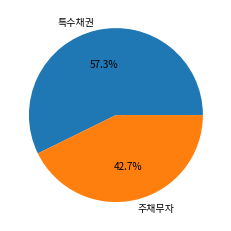

In [20]:
labels = ['특수채권','주채무자']
ratio = ['6176','4608']
plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.show()

### 연체등록년월

In [34]:
df_overdue["over_ym"].value_counts()

201708    312
201811    311
201712    285
201908    285
201905    269
         ... 
201209     10
201210      8
201304      6
201202      3
201204      2
Name: over_ym, Length: 103, dtype: int64

In [35]:
df_overdue["over_amt"].sum()

219813120000

In [54]:
df_overdue_C = df_overdue.loc[[1,100,5],:]
df_overdue_C.head()

,chaju_id,com_id,check_ym,sector_cd,sector,over_type,over_reason_cd,over_reason,over_regist,over_ym,over_amt
1,C-1001,S21-01018,202002,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
100,C-1036,S01-01016,201907,S01,은행(S01),공공(2),R-9997,부도 정보,주채무자(0),201011,95000000
5,C-1019,S01-01001,202010,S01,은행(S01),공공(2),R-0101,대출원금·이자연체,주채무자(0),202002,270000000


### groupby

In [157]:
df_overdue_gb=df_overdue.groupby(['chaju_id','com_id','sector','over_reason','over_regist','over_ym','over_amt'])['over_amt'].count()
df_overdue_gb=pd.DataFrame(df_overdue_gb)

In [158]:
df_overdue_gb

over_amt
chaju_id com_id    sector            over_reason   over_regist over_ym over_amt           
C-1001   S21-01018 상호저축은행(S21)       대출원금·이자연체     주채무자(0)     202001  5700000           2
C-1019   S01-01001 은행(S01)           대출원금·이자연체     주채무자(0)     202002  270000000        11
         S05-01002 신용카드사(S05)        신용카드대금연체      특수채권(7)     201811  900000           17
         S98-01028 기타-장학재단/기금 등(S98) 신용보증대지급금      주채무자(0)     201906  12000000         19
         S98-01049 기타-장학재단/기금 등(S98) 대출원금·이자연체     주채무자(0)     201604  10000000         25
...                                                                                    ...
C-2987   S05-01010 신용카드사(S05)        장기카드대출(카드론)연체 특수채권(7)     201801  5200000          25
         S17-01085 캐피탈/할부/리스 등(S17)  대출원금·이자연체     특수채권(7)     201807  630000            1
         S21-01019 상호저축은행(S21)       대출원금·이자연체     주채무자(0)     201810  9600000           4
C-2992   S98-01041 기타-장학재단/기금 등(S98) 신용보증대지급금      주채무자(0)     201411  9600000          25
C-2994   S98-01024 기타-장학재단/기금 등(S98) 지급보증대지급금      주채무자(0)     201505  500000            6

[884 rows x 1 columns]

In [168]:
df_overdue_gb.to_excel("연체정보.xlsx")